<a href="https://colab.research.google.com/github/CarolineAndradeR/Script_Python/blob/master/preparacao_dados_e_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install sklearn
!pip install scipy
#Bibliotecas de visualização de dados
!pip install seaborn
!pip install matplotlib

**Ferramentas de Probabilidade**

In [ ]:
#Módulos de Estatística
from scipy.stats import binom, poisson, norm

#Binominal
n = 5
p = 0.8
binom.pmf(k=1, n=n, p=p)

In [ ]:
#Poisson
mu = 2
poisson.pmf(k=1, mu=mu)

0.2706705664732254

In [ ]:
#Normal
media = 30
desvio_padrao = 6
norm.pdf(x = 25, loc = media, scale = desvio_padrao)

0.04698531256838376

**Ferramentas de Amostragem**

In [ ]:
#Iniciando montagem do drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

arq_dados_paises = '/content/drive/MyDrive/hdi_paises.csv'
df_dados_paises = pd.read_csv(arq_dados_paises)
df_dados_paises.head()

In [ ]:
df_dados_paises.tail(50)
#Olhar os dados do início e do fim para ver se tem sugerias

In [ ]:
#Buscar sempre coletar dados para garantir a integridade dos dados
#Amostragem com recorte dos dados
#Existe diversas formas, enteder cada necessidade para garantir que os dados esteja lá
df_amostra_50 = df_dados_paises[ df_dados_paises['Year'] == 2016].sample(n=50)
df_amostra_50

**Ferramentas de preparação de dados e machine learning**

In [ ]:
arq_dados_paises = '/content/drive/MyDrive/train_ames_housing.csv'
df_dados_imoveis = pd.read_csv(arq_dados_paises)
df_dados_imoveis.head()

In [ ]:
#Correlação entre os dados
df_dados_imoveis.corr()

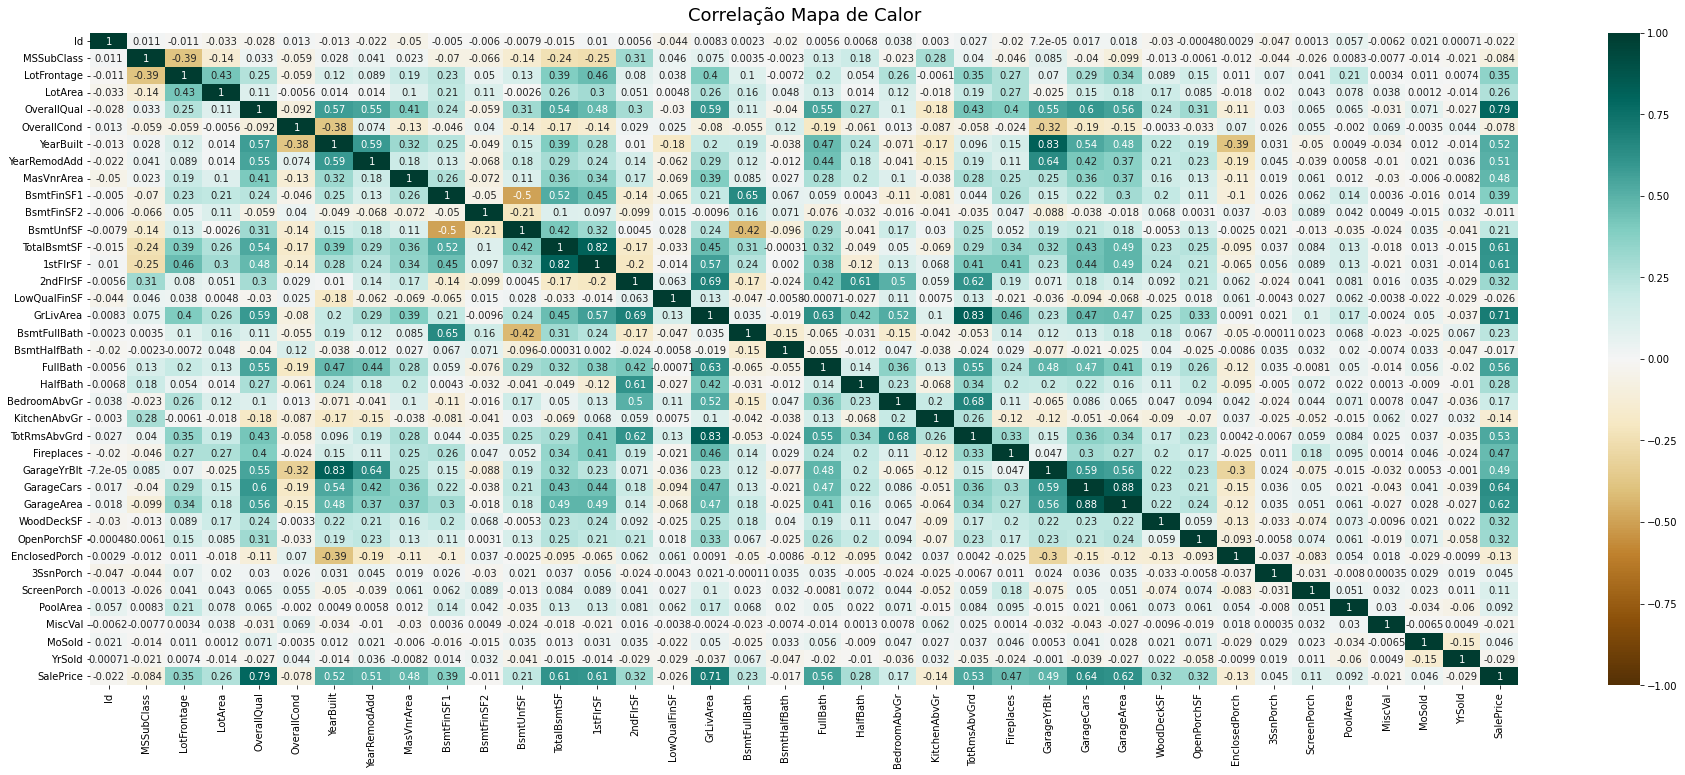

In [10]:
#Correlação, em matriz.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32,12))
#Heatmap, mapa de calor
heatmap = sns.heatmap(df_dados_imoveis.corr(),vmin=-1,vmax=1, annot=True, cmap='BrBG')
#Edição do cabeçalho
heatmap.set_title('Correlação Mapa de Calor', fontdict={'fontsize':18}, pad=12);

#Os resultados podem ser salvos para comparação, e análise postoriores
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [11]:
#Processo de agrupamento/cluesteorização

#X - São os dados que vão ser usados no modelo de aprendizagem de máquina (os dados tem que ser númericos, tem como fazer a conversão para númericos)
#Pegar todos as colunas exceto a última
X = df_dados_imoveis.iloc[:, :-1]
#y (minusculo) - Variavel objetivo daqueles dados
#pegando apenas a última coluna
y = df_dados_imoveis.iloc[:, -1]

#Basicamente pegar todas as informações menos o preço de vendas que é o nosso objetivos, entrega os atributos ao X.
#Retornara um recorte dos dados

In [ ]:
df_dados_imoveis

In [ ]:
#Atributos que vão participar do agrupamento
atributos = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt']
df_ds_imoveis = df_dados_imoveis[atributos].copy()
df_ds_imoveis

In [14]:
X = df_ds_imoveis.iloc[:, :-1]
y = df_ds_imoveis.iloc[:, -1]

In [15]:
from sklearn import metrics
#Usando para calcular uma distancia entre instancias
from sklearn.metrics import pairwise_distances
#Retorna diversos Dataset
from sklearn import datasets

import numpy as np
#Algoritmo de clusterização (separa de acordo com o paramentro que passarmos)
from sklearn.cluster import KMeans

#Random_state (repetição), manter a uniformidade do experimento caso alguém vá repetir/gerar o experimento ser feito a mesma seleção
#N_clusters o número de separações
#.Fit processos de clusterização em si
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)

#Cada grupo gerado recebe um label (etiqueta)
df_ds_imoveis['cluster'] = kmeans_model.labels_

#Função pandas de agrupamento de linhas pela coluna que tem o mesmo cluster e fazer uma contagem de quantos imoveis esta dentro do mesmo cluster
df_ds_imoveis.groupby(by='cluster').agg('count')

,MSSubClass,LotArea,OverallCond,YearBuilt
cluster,,,,
0,905,905,905,905
1,4,4,4,4
2,531,531,531,531
3,20,20,20,20
